In [ ]:
!pip install numpy matplotlib networkx graphviz

# HW 1

## Граф

In [ ]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from graphviz import Digraph

file_path = '/content/DomClick_09.csv'
df = pd.read_csv(file_path)

df['DataTime'] = pd.to_datetime(df['DataTime'])

df = df.sort_values(by=['Process_ID', 'DataTime'])

In [ ]:
df

,Process_ID,Status_Name,DataTime
0,85,ОТПРАВЛЕНО В МИДДЛ,2018-09-20 12:54:00
1,85,ПРОВЕРКА В МИДДЛ,2018-09-20 12:54:00
2,85,ОТПРАВЛЕНО В БАНК,2018-09-20 13:10:00
3,85,ПРИНЯТО В РАБОТУ ЦОПП,2018-09-20 15:30:00
4,85,КРЕДИТНЫЙ АНАЛИЗ,2018-09-20 15:46:00
...,...,...,...
384917,7863645,ЧЕРНОВИК,2018-09-11 21:53:00
384918,8296646,ЧЕРНОВИК,2018-09-12 09:58:00
384919,8447119,ЧЕРНОВИК,2018-09-12 08:10:00
384920,8458581,ЧЕРНОВИК,2018-09-12 08:45:00


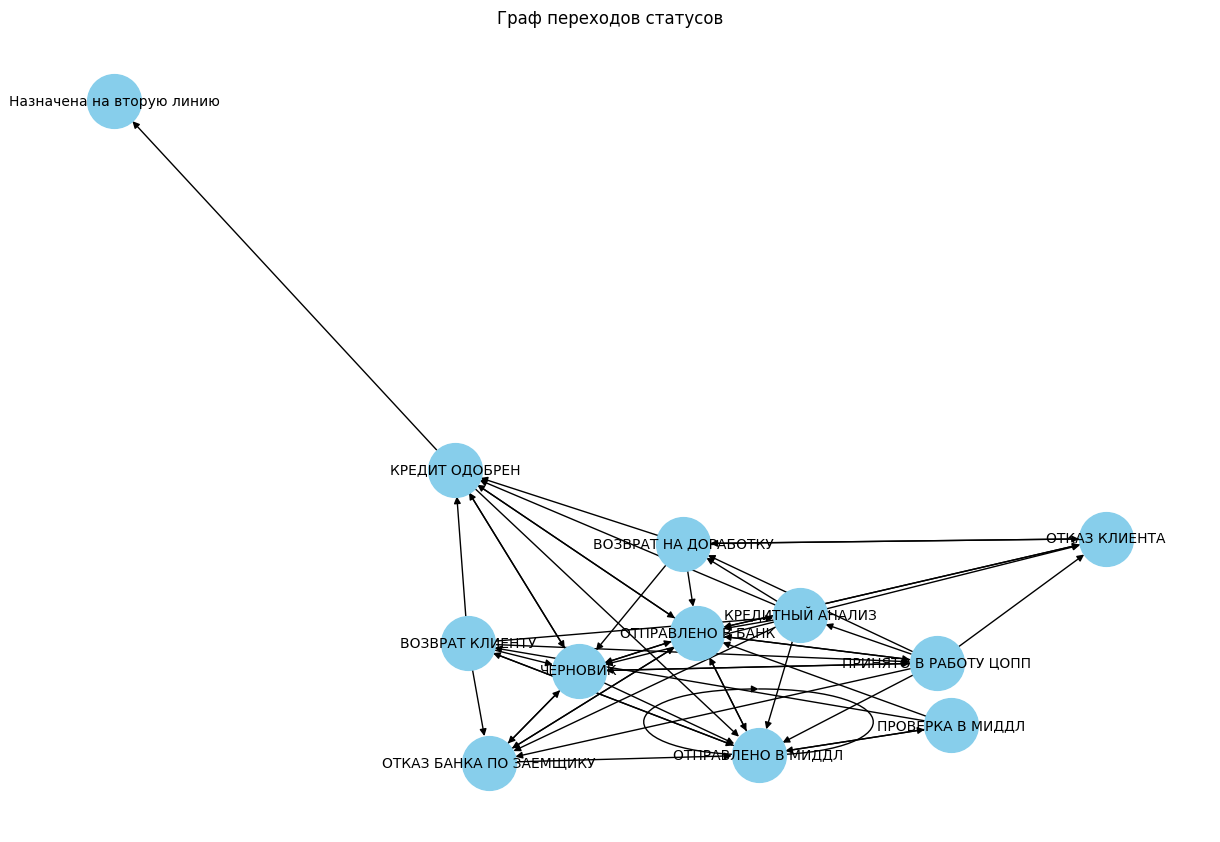

In [ ]:
def build_graph(df):
    G = nx.DiGraph()

    for _, group in df.groupby('Process_ID'):
        statuses = group['Status_Name'].tolist()
        for i in range(len(statuses) - 1):
            G.add_edge(statuses[i], statuses[i + 1])

    return G

G = build_graph(df)

plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=1500, edge_color='k', linewidths=1, font_size=10, arrows=True)
plt.title('Граф переходов статусов')
plt.show()

In [ ]:
def draw_graphviz(G):
    dot = Digraph(comment='Граф переходов статусов')

    for node in G.nodes:
        dot.node(node, node)

    for edge in G.edges:
        dot.edge(edge[0], edge[1])

    return dot

# Визуализация с Graphviz
graphviz_dot = draw_graphviz(G)
graphviz_dot.render('process_graph', view=True)

'process_graph.pdf'

## Функции

In [ ]:
log_df = df.copy()
log_df['EventTime'] = pd.to_datetime(log_df['DataTime'])
ordered_log = log_df.sort_values(by=['Process_ID', 'EventTime'])

ordered_log['Interval'] = ordered_log.groupby('Process_ID')['EventTime'].diff()

# Метрики
processes_total = ordered_log['Process_ID'].nunique()
time_span = ordered_log.groupby('Process_ID')['EventTime'].agg(['min', 'max'])
time_span['Duration'] = time_span['max'] - time_span['min']
avg_duration = time_span['Duration'].mean()
process_complexity = ordered_log['Status_Name'].eq('ВОЗВРАТ НА ДОРАБОТКУ').mean()
approval_rate = ordered_log['Status_Name'].eq('КРЕДИТ ОДОБРЕН').mean()
rework_frequency = ordered_log['Status_Name'].isin(['ВОЗВРАТ НА ДОРАБОТКУ', 'ОТКАЗ БАНКА ПО ЗАЕМЩИКУ']).mean()

print(f"Общее количество процессов: {processes_total}")
print(f"Средняя продолжительность: {avg_duration}")
print(f"Сложность процесса: {process_complexity:.2f}")
print(f"Доля успешных процессов: {approval_rate:.2f}")
print(f"Частота необходимости доработки: {rework_frequency:.2f}")


Общее количество процессов: 56165
Средняя продолжительность: 1 days 09:54:31.068815098
Сложность процесса: 0.04
Доля успешных процессов: 0.11
Частота необходимости доработки: 0.06
